<a href="https://colab.research.google.com/github/bappy15010/Brain-Tumor-Detection/blob/master/Final_Model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green'> **Details on Br35H-Mask-RCNN dataset**:

*   <font color='green'>TRAIN -

*   <font color='green'> TEST -  

*  <font color='green'> VALID -

1.  <font color='green'> No - The folder no contains 1500 Brain MRI Images that are non-tumorous

1.  <font color='green'> Pred

1.  <font color='green'> Yes - The folder yes contains 1500 Brain MRI Images that are tumorous


In [162]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [163]:
import tensorflow as tf # Import TensorFlow library
tf.test.gpu_device_name() # Check if a GPU device is available

''

In [164]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import warnings
import glob

# Suppressing warnings
warnings.filterwarnings("ignore")


# Importing InceptionV3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3

<font color='blue'> **Modified original code**

---



---



In [165]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the desired directory
os.chdir('/content/drive/My Drive/Colab Notebooks/BIO 6306/Brain Tumor Detection Convolutional Neural Network Project/Modified/DATASET/yes/')

# Access files and directories in the specified location
# For example, you can list the files in the directory
files = os.listdir()
print("Files in the directory:")
print(files)


Mounted at /content/drive
Files in the directory:
['y1267.jpg', 'y1.jpg', 'y1108.jpg', 'y14.jpg', 'y176.jpg', 'y1199.jpg', 'y1040.jpg', 'y1092.jpg', 'y101.jpg', 'y1341.jpg', 'y1026.jpg', 'y1225.jpg', 'y1305.jpg', 'y1087.jpg', 'y1132.jpg', 'y1020.jpg', 'y1412.jpg', 'y1486.jpg', 'y15.jpg', 'y1392.jpg', 'y11.jpg', 'y1269.jpg', 'y1164.jpg', 'y1210.jpg', 'y1140.jpg', 'y1477.jpg', 'y1057.jpg', 'y136.jpg', 'y1363.jpg', 'y1277.jpg', 'y1496.jpg', 'y1176.jpg', 'y1141.jpg', 'y1158.jpg', 'y1360.jpg', 'y1423.jpg', 'y1006.jpg', 'y1414.jpg', 'y1190.jpg', 'y1215.jpg', 'y1435.jpg', 'y1483.jpg', 'y1472.jpg', 'y1106.jpg', 'y109.jpg', 'y1443.jpg', 'y1097.jpg', 'y1278.jpg', 'y126.jpg', 'y1295.jpg', 'y1101.jpg', 'y1187.jpg', 'y1499.jpg', 'y1134.jpg', 'y1282.jpg', 'y1257.jpg', 'y1339.jpg', 'y1163.jpg', 'y202.jpg', 'y1066.jpg', 'y1231.jpg', 'y1366.jpg', 'y1137.jpg', 'y1407.jpg', 'y1433.jpg', 'y1178.jpg', 'y1367.jpg', 'y1352.jpg', 'y1461.jpg', 'y1274.jpg', 'y1473.jpg', 'y160.jpg', 'y1324.jpg', 'y105.jpg', 'y10

In [166]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the desired directory
os.chdir('/content/drive/My Drive/Colab Notebooks/BIO 6306/Brain Tumor Detection Convolutional Neural Network Project/Modified/DATASET/no/')

# Access files and directories in the specified location
# For example, you can list the files in the directory
files = os.listdir()
print("Files in the directory:")
print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in the directory:
['no270.jpg', 'no1470.jpg', 'no1455.jpg', 'no238.jpg', 'no157.jpg', 'no1176.jpg', 'no1424.jpg', 'no1330.jpg', 'no248.jpg', 'no177.jpg', 'no185.jpg', 'no260.jpg', 'no1162.jpg', 'no1489.jpg', 'no1452.jpg', 'no1495.jpg', 'no1372.jpg', 'no1269.jpg', 'no1475.jpg', 'no1146.jpg', 'no1426.jpg', 'no1312.jpg', 'no1086.jpg', 'no1287.jpg', 'no1214.jpg', 'no1342.jpg', 'no1471.jpg', 'no204.jpg', 'no1114.jpg', 'no1451.jpg', 'no264.jpg', 'no1095.jpg', 'no1301.jpg', 'no1056.jpg', 'no120.jpg', 'no1421.jpg', 'no1217.jpg', 'no230.jpg', 'no265.jpg', 'no1131.jpg', 'no1266.jpg', 'no1305.jpg', 'no1291.jpg', 'no21.jpg', 'no237.jpg', 'no1304.jpg', 'no1168.jpg', 'no1283.jpg', 'no262.jpg', 'no25.jpg', 'no1082.jpg', 'no1083.jpg', 'no193.jpg', 'no1066.jpg', 'no1428.jpg', 'no1245.jpg', 'no1412.jpg', 'no220.jpg', 'no1407.jpg', 'no279.jpg', 'no1350.jpg', 'no1166.jpg',

In [167]:
import cv2
import glob
import numpy as np

# Initialize empty lists to store image data and labels
tumor = []
no_tumor = []

# Iterate through all image files in the 'yes' directory
for file in glob.iglob('/content/drive/My Drive/Colab Notebooks/BIO 6306/Brain Tumor Detection Convolutional Neural Network Project/Modified/DATASET/yes/*.jpg'):
    img = cv2.imread(file)  # Reading the images from the path
    if img is not None:  # Check if the image is loaded successfully
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Changing the color space from BGR to RGB
        img = cv2.resize(img, (150, 150))  # Resize the image to a fixed size of 150x150 pixels
        tumor.append((img, 1))  # Append a tuple containing the preprocessed image and label 1 (tumor) to the tumor list

# Iterate through all image files in the 'no' directory
for file in glob.iglob('/content/drive/My Drive/Colab Notebooks/BIO 6306/Brain Tumor Detection Convolutional Neural Network Project/Modified/DATASET/no/*.jpg'):
    img = cv2.imread(file)  # Read the image from the file path
    if img is not None:  # Check if the image is loaded successfully
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the color space from BGR to RGB
        img = cv2.resize(img, (150, 150))  # Resize the image to a fixed size of 150x150 pixels
        no_tumor.append((img, 0))  # Append a tuple containing the preprocessed image and label 0 (no tumor) to the no_tumor list

data = tumor + no_tumor  # Combine the tumor and no_tumor lists to create a single list containing all the data

# Extract the image data (x) and labels (y) from the combined data list
x = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])


#NOTE
#In this code, the features (X) are the images themselves, and the labels (y) are whether or not the
#image contains a tumor.

#Features (X): The features are the images themselves, which are stored in the variable x. Each image is
#preprocessed (converted to RGB and resized) and stored in the x array.
#Labels (y): The labels indicate whether each image contains a tumor or not. They are stored in the variable
#y. The label 1 represents that a tumor is present, while 0 represents no tumor.

#. So for each image, you have its features (the image itself with tumor or no tumor) in x and its label (0 or 1) in y

In [168]:
def plot_img(i):
    plt.figure(figsize=(7,7))     # Create a new figure with a specified size
    plt.imshow(x[i])     # Display the image indexed by 'i' from the array 'x'
    if y[i]==1:     # Check the label of the image
        plt.title('Tumor')         # If the label is 1, set the title to 'Tumor'
    if y[i]==0:         # If the label is 0, set the title to 'No_Tumor'
        plt.title('No_Tumor')

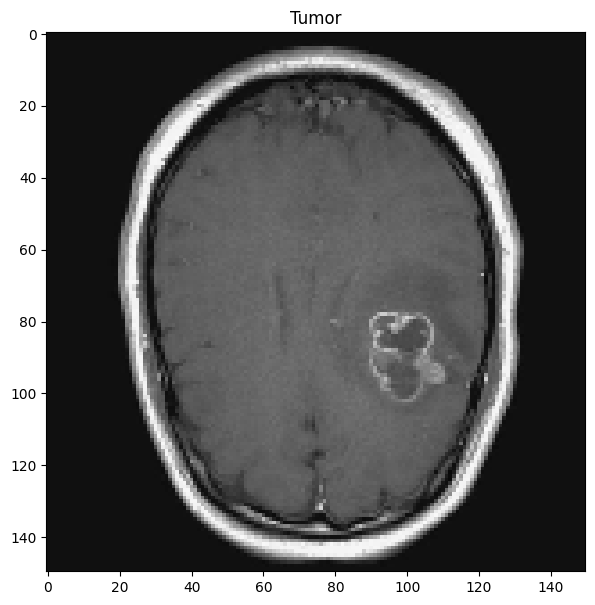

In [169]:
import matplotlib.pyplot as plt
plot_img(300) #This function plot_img(300) will plot the image at index 300 from the dataset along with its
#corresponding label. If the label associated with the image at index 300 is 1, it will be titled 'Tumor', and if
#the label is 0, it will be titled 'No_Tumor'.


In [170]:
from sklearn.utils import shuffle
x,y=shuffle(x,y,random_state=101) # Shuffle the data

In [171]:
#split data
#so when you split into x train x valid x test and y train y valid y test, your x train for example should
#print an image (pixel values) and the corresponding y train should be 1 or 0 signalling either no tumor or a
#tumor


from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [172]:
#Normalizing the pixel values of your image data before feeding them into a machine learning model.
#Normalizing pixel values can help improve the training process and convergence of the model.
#The typical range of pixel values in images is [0, 255], where 0 represents black and 255 represents white.
#By dividing all pixel values by 255, you scale them to the range [0, 1], making them suitable for many machine
#learning algorithms, especially those that expect input features to be on a similar scale.
x_train=x_train/255
x_test=x_test/255

In [173]:
#Model building starts
#import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
#from keras.layers.normalization import BatchNormalization
#import numpy as np

tf.keras.backend.clear_session()

In [174]:

#update
# Initial Block of the model
ini_input = keras.Input(shape=(150, 150, 3), name="image")  # Define the input layer with shape (150, 150, 3)
# Define the input layer with shape (150, 150, 3)
#creates an input layer for the model with a shape of (150, 150, 3), indicating that the input images
#have dimensions 150x150 pixels and are color (3 channel).

# First Convolutional Block
x1=layers.Conv2D(64,(22,22),strides=2)(ini_input)
x1=layers.MaxPooling2D((4,4))(x1)
x1=layers.BatchNormalization()(x1)
#These lines define the first convolutional block of the network. It applies a convolutional
# layer with 64 filters of size 22x22, followed by max pooling with a pool size of 4x4 and batch
# normalization.

# Second Convolutional Block
x2=layers.Conv2D(128,(11,11),strides=2,padding="same")(x1)
x2=layers.MaxPooling2D((2,2))(x2)
x2=layers.BatchNormalization()(x2)
#These lines define the second convolutional block. Similar to the first block but with different
#parameters and padding set to "same".


# Third Convolutional Block
x3=layers.Conv2D(256,(7,7),strides=2,padding="same")(x2)
x3=layers.MaxPooling2D((2,2))(x3)
x3=layers.BatchNormalization()(x3)
#These lines define the third convolutional block, again similar to the previous blocks but with
#different parameters.


# Fourth Convolutional Block
#x4=layers.Conv2D(512,(3,3),strides=2,padding="same")(x3)
#x4=layers.MaxPooling2D((2,2))(x4)
#x4=layers.BatchNormalization()(x4)
#These lines define the fourth convolutional block.

#Update
# Fourth Convolutional Block
x4 = layers.Conv2D(512, (3, 3), strides=1, padding="same")(x3)
x4 = layers.MaxPooling2D((2, 2), padding="same")(x4)  # Adjusted padding to "same"
x4 = layers.BatchNormalization()(x4)


# Global Average Pooling
x5=layers.GlobalAveragePooling2D()(x4)
x5=layers.Activation("relu")(x5)
#These lines apply global average pooling to reduce the spatial dimensions of the feature maps,
#followed by a ReLU activation function.


# Fully Connected Layers
x6=layers.Dense(1024,"relu")(x5)
x6=layers.BatchNormalization()(x6)
x7=layers.Dense(512,"relu")(x6)
x7=layers.BatchNormalization()(x7)
x8=layers.Dense(256,"relu")(x7)
x8=layers.BatchNormalization()(x8)
x8=layers.Dropout(.2)(x8)
#These lines define fully connected layers with different numbers of units, followed by batch
#normalization and dropout regularization.


# Output Layer
x9=layers.Dense(2)(x8)
pred=layers.Activation("softmax")(x9)
#These lines define the output layer with 2 units (assuming it's a classification problem with 2 classes),
#followed by a softmax activation function to obtain class probabilities.


# Create the model
model=keras.Model(inputs=ini_input,outputs=pred)
#This line creates the Keras model, specifying the input and output layers. The input layer is ini_input,
#and the output layer is pred.


#Overall, the provided code defines a convolutional neural network (CNN) architecture. In a CNN, each
#layer learns to extract specific features or patterns from the input data (in this case, images).
#Overall, each layer in the CNN learns increasingly complex and abstract representations of the input
#images, allowing the network to effectively classify or analyze them.


In [175]:
model.summary()

#provides a concise summary of the model architecture (CNN), including the number of parameters in
#each layer and the total number of parameters in the model

#Layer (type): Name and type of the layer in the model.
#Output Shape: Shape of the output tensor produced by the layer.
#Param #: Number of trainable parameters in the layer.
#Total params: Total number of trainable parameters in the model.
#Trainable params: Total number of trainable parameters in the model that will be updated during training.
#Non-trainable params: Total number of non-trainable parameters in the model (typically associated with BatchNormalization layers).

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 65, 65, 64)        92992     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         991360    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 128)         0     

The above is a summary of the layers within a CNN model. Essentially the input images will go through the cnn and the cnn will learn it so well to be able to tell if it is a tumor or not. how exactly is goes about it so complex, it can be described like a black box.  Yes, CNNs can indeed be considered as "black box" models, especially in complex architectures or when dealing with large datasets. While we can understand the general principles behind how they work, the exact process by which they learn to classify images can be quite intricate and difficult to interpret directly.



In [176]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"]) # compiles the model, specifying the loss function, optimizer, and evaluation metrics to be used during training.


#loss="sparse_categorical_crossentropy": This specifies the loss function to be used during training.
#In this case, it's the sparse categorical cross-entropy loss, which is commonly used for multi-class
#classification problems where the labels are integers.

#optimizer="adam": This specifies the optimizer to be used for training the model. "Adam" is a popular
#optimization algorithm that dynamically adjusts the learning rate during training based on the gradients
#of the loss function.

#metrics=["accuracy"]: This specifies the evaluation metric to be used to monitor the performance of the
#model during training. In this case, "accuracy" is used, which measures the proportion of correctly
#classified samples.

#After compiling the model, it's ready to be trained using the specified loss function, optimizer, and
#evaluation metrics.

In [177]:
r = model.fit(
    x_train,                # Input training data
    y_train,                # Target training data
    epochs=50,               # Number of epochs (iterations over the entire dataset)
    batch_size=32,          # Number of samples per gradient update
                            # Determines the number of samples that will be processed by the model at once before updating the weights
                            # 32 batches will be processed per epoch
    verbose=1,              # Verbosity mode (0: silent, 1: progress bar, 2: one line per epoch)
    validation_data=(x_valid, y_valid),   # Data on which to evaluate the loss and any model metrics at the end of each epoch
    shuffle=False           # Whether to shuffle the training data before each epoch
)

# Overall, this code trains the compiled model (model) using the provided training data (x_train and y_train).

Epoch 1/50
66/66 [==============================] - 189s 3s/step - loss: 0.6557 - accuracy: 0.7429 - val_loss: 933.4676 - val_accuracy: 0.4600
Epoch 2/50
66/66 [==============================] - 176s 3s/step - loss: 0.3580 - accuracy: 0.8529 - val_loss: 157.0106 - val_accuracy: 0.5000
Epoch 3/50
66/66 [==============================] - 180s 3s/step - loss: 0.2204 - accuracy: 0.9129 - val_loss: 1017.5479 - val_accuracy: 0.4600
Epoch 4/50
66/66 [==============================] - 208s 3s/step - loss: 0.1759 - accuracy: 0.9352 - val_loss: 1614.8184 - val_accuracy: 0.4600
Epoch 5/50
66/66 [==============================] - 204s 3s/step - loss: 0.1460 - accuracy: 0.9457 - val_loss: 2134.5583 - val_accuracy: 0.4600
Epoch 6/50
66/66 [==============================] - 198s 3s/step - loss: 0.1533 - accuracy: 0.9481 - val_loss: 1690.2491 - val_accuracy: 0.4600
Epoch 7/50
66/66 [==============================] - 202s 3s/step - loss: 0.1021 - accuracy: 0.9676 - val_loss: 2016.7408 - val_accuracy: 0

In [178]:
#model.evaluate(x, y, verbose=0) computes the accuracy
#and loss metrics for the given dataset (training or validation).

#The accuracy and loss values are returned as part of the train_metrics
#and val_metrics arrays.
#Assuming accuracy is the second metric and loss is the first metric, we extract
#these values from the arrays using indices 1 and 0, respectively.

# Evaluate the trained model on the training dataset and compute metrics
# x_train: input features of the training dataset
# y_train: target labels of the training dataset
# verbose=0: the evaluation process runs silently without printing progress information
train_metrics = model.evaluate(x_train, y_train, verbose=0)

# Evaluate the trained model on the validation dataset and compute metrics
# x_valid: input features of the validation dataset
# y_valid: target labels of the validation dataset
# verbose=0: the evaluation process runs silently without printing progress information
val_metrics = model.evaluate(x_valid, y_valid, verbose=0)

# Extract the training accuracy value from the train_metrics array
# Assuming accuracy is the second metric computed during evaluation (index 1)
train_acc = train_metrics[1]


# Extract the validation accuracy value from the val_metrics array
# Assuming accuracy is the second metric computed during evaluation (index 1)
val_acc = val_metrics[1]

# Extract the training loss value from the train_metrics array
# Assuming loss is the first metric computed during evaluation (index 0)
train_loss = train_metrics[0]

# Extract the validation loss value from the val_metrics array
# Assuming loss is the first metric computed during evaluation (index 0)
val_loss = val_metrics[0]

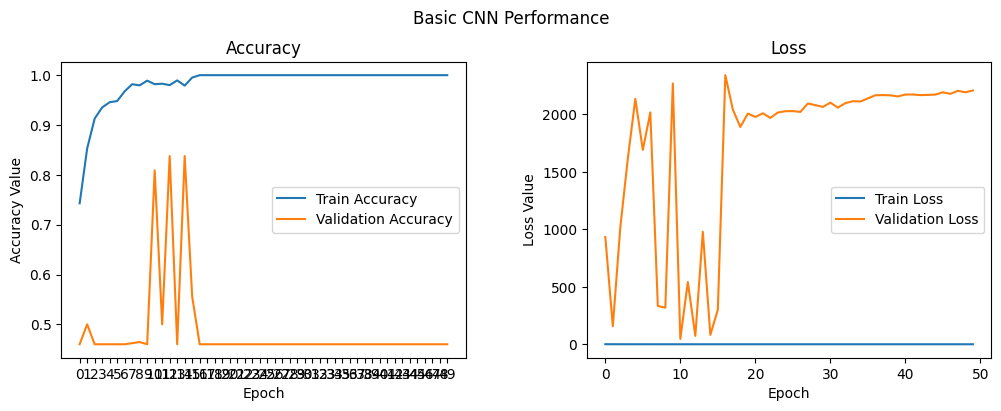

In [195]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) # Create a figure with 1 row and 2 columns of subplots, with a size of 12x4 inches
t = f.suptitle('Basic CNN Performance', fontsize=12) # Add a title to the figure
f.subplots_adjust(top=0.85, wspace=0.3) # Adjust the layout of the subplots

#epoch_list = list(range(0,80)) # Create a list of epoch numbers from 0 to 79
#updates based on above epoch change to 1
epoch_list = list(range(0,50)) # Create a list of epoch numbers from 0 to 10


#Plot training and validation accuracy on the first subplot (ax1)
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')

# Set ticks, labels, title, and legend for the first subplot (ax1)
#ax1.set_xticks(np.arange(0, 80, 4)) #updates based on above epoch change to 1
ax1.set_xticks(np.arange(0, 50, 1))

ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

# Plot training and validation loss on the second subplot (ax2)
ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')

# Set ticks, labels, title, and legend for the second subplot (ax2)
#ax1.set_xticks(np.arange(0, 80, 4)) #updates based on above epoch change to 1
ax1.set_xticks(np.arange(0, 50, 1))

ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [181]:
y_pred=model.predict(x_test) # Make predictions on the test data using the trained model
y_pred=np.round(y_pred,0) # Round the predictions to the nearest integer (0 or 1)
y_pred[:5] # Print the first 5 elements of the rounded predictions array


15/15 [==============================] - 10s 658ms/step


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

For example, the first row [0., 1.] indicates that the model predicts the probability of class 0 to be approximately 0% and the probability of class 1 to be approximately 100%.



In [182]:
y_pred.shape #The shape of Y_pred represents the dimensions of the array storing the predicted class labels.
#For example, if there are 1000 samples in the test data, Y_pred.shape would return (600,), indicating that there are 600 predicted class labels in Y_pre

(450, 2)

The shape (450, 2) of the y_pred array indicates that there are 450 samples and 2 classes. Each row represents the predicted probabilities for each class for a single sample.



In [183]:
y_test.shape #The shape of testy represents the dimensions of the array storing the true class labels for
#the test data. Since it typically contains the true labels for each sample in the test data, the shape
#will be (n,), where n is the number of samples in the test data.

(450,)

The shape (450,) of the y_test array indicates that it contains 450 labels for the test data samples. Since it is a one-dimensional array, it suggests that you have a binary classification problem with only two classes (0 and 1).



In [184]:
y_pred #The provided content shows the predicted class labels stored in the array Y_pred. The shape of this array is (610,), indicating that there are 610 predicted class labels in
#total

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [185]:
from sklearn.metrics import confusion_matrix

# Convert probabilities to binary predictions using a threshold of 0.5
threshold = 0.5
#If you want to update y_pred to only show either 1 or 0 (instead of the probabilities),
#you can apply a threshold to convert the probabilities to binary predictions. Here's how you can do it:
binary_predictions = (y_pred[:, 1] >= threshold).astype(int)
print(binary_predictions)


[1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1
 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 0 1]


In [186]:
y_pred=binary_predictions #make binary_predictions to y_pred
y_pred


array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [187]:
y_test #compared to actual values

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [188]:
from sklearn.metrics import classification_report, confusion_matrix # Import the necessary functions from scikit-learn
print('Confusion Matrix') # Print header for the confusion matrix
print(confusion_matrix(y_test, y_pred)) # Calculate and print the confusion matrix

Confusion Matrix
[[215   3]
 [  1 231]]


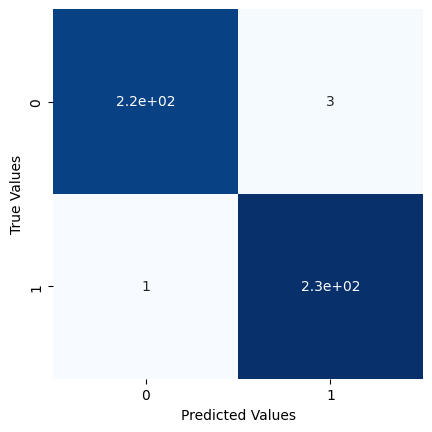

In [189]:
import seaborn as sns # Import the Seaborn library
cm=confusion_matrix(y_test, y_pred) # Calculate the confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues) # Create a heatmap of the confusion matrix using Seaborn

# Set labels for the x-axis and y-axis
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [190]:
from sklearn.metrics import classification_report

# Define target names
target_names = ['No Tumor', 'Tumor']

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, binary_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       0.99      1.00      0.99       232

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [191]:
import numpy as np
from sklearn import metrics

# Compute the Receiver Operating Characteristic (ROC) curve and the area under the curve (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1) #Since you mentioned that you want 0 to represent "no tumor" and 1 to represent "tumor", you should set pos_label=1.
metrics.auc(fpr, tpr) #calculates the Area Under the Curve (AUC) score using scikit-learn's auc function.


0.9909640936412527

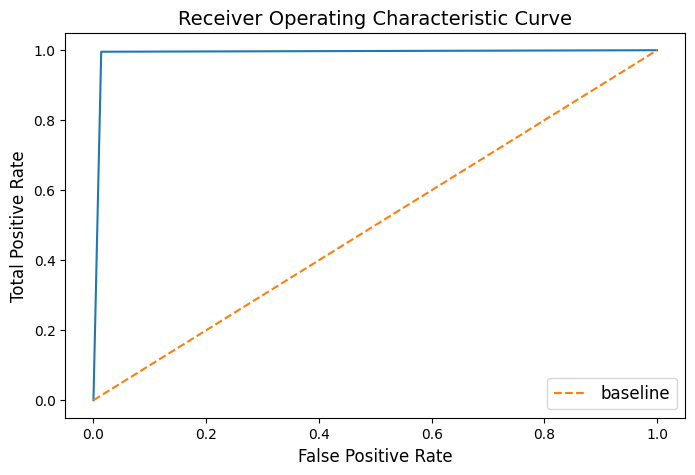

In [192]:
fig, ax = plt.subplots(figsize=(8,5)) # Create a new figure and axis for plotting
ax.plot(fpr, tpr) # Plot the ROC curve

# Plot the baseline (diagonal) line
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')

# Add title and labels to the plot
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)

# Add legend to the plot
plt.legend(fontsize=12);

#In summary, an ideal ROC curve would hug the top-left corner of the plot, with a TPR close to 1 and an FPR close to 0,
#resulting in an AUC of 1. This indicates a classifier that makes no errors in distinguishing between positive and negative instances.